In [1]:
import cv2
import matplotlib.pyplot as plt

## Contour Detection

OpenCV has 2 main functions for boundaries :<br>
   1. findContours()<br>
   2. drawContours()<br>

OpenCV has two different algorithms for contour detection:<br>
   1. CHAIN_APPROX_SIMPLE<br>
   2. CHAIN_APPROX_NONE<br>
<br>

Steps :
1. Read the Image and convert it to Grayscale Format
2. Apply Binary Thresholding ( or  Canny edge detection )
3. Find the Contours4. Draw Contours on the Original RGB Image.


In [109]:
# read image
image = cv2.imread("mix.jpg") 
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # convert BGR to RGB
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # convert BGR to Gray

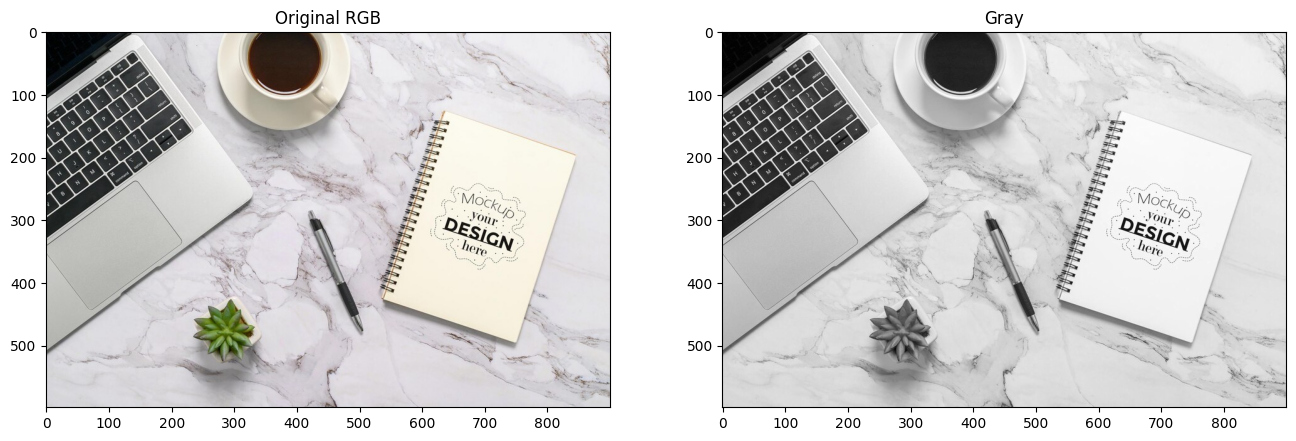

In [110]:
plt.figure(figsize=(16, 10)) 

plt.subplot(121)
plt.title("Original RGB")
plt.imshow(image_rgb)

plt.subplot(122)
plt.title("Gray")
plt.imshow(image_gray,cmap="gray")

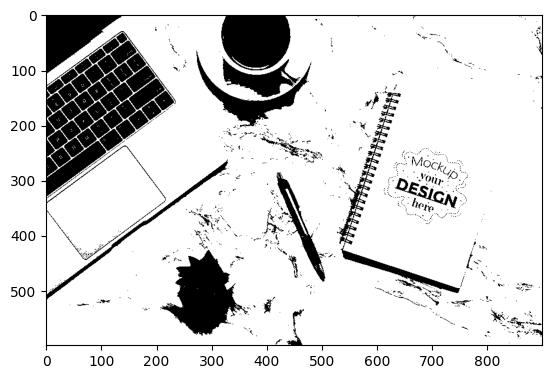

In [116]:
# Binary thresholding
ret , thresh =cv2.threshold(image_gray,175,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap="gray")

cv2.findContours <br>
this function used for finding contour in binary image (grayscale image)<br>

Parameters :
1. image :  You can use threshold,Canny, and others to create a binary image out of a grayscale<br>
            Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary<br><br>
2. mode : Mode for finding contour<br>
        RETR_EXTERNAL : retrieves only the extreme outer contours<br>
        RETR_LIST : retrieves all of the contours without establishing any hierarchical relationships.<br>
        RETR_TREE : retrieves all of the contours and reconstructs a full hierarchy of nested contours.<br><br>
3. method : approach for how to save points contours ..<br>
         cv2.CHAIN_APPROX_NONE : all the points in contour<br>
         cv2.CHAIN_APPROX_SIMPLE : points which are between only straight lines<br>
         most of the time there isnt any diff between this two

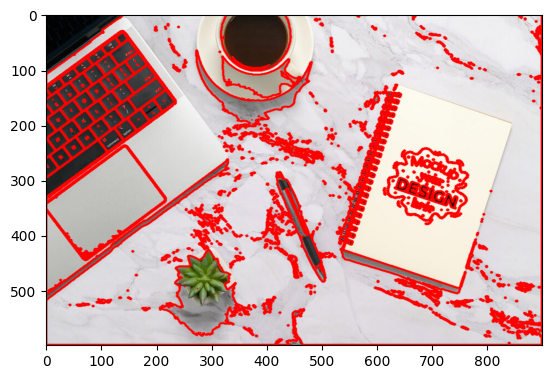

In [117]:
# detect the contours on the thresh image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 

#create copy of rgb image
image_copy = image_rgb.copy()

# draw contours on image_copy
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=2, lineType=cv2.LINE_AA)

plt.imshow(image_copy)

In [118]:
# to actually visualize the effect of `CHAIN_APPROX_SIMPLE`, we need a proper image

In [146]:
image_rgb_copy1=image_rgb.copy()
contours1, hierarchy1 = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 

for contour in contours1:
    cv2.circle(image_rgb_copy1,(contour[0][0][0],contour[0][0][1]),3,(0,0,255),1)

In [147]:
image_rgb_copy2=image_rgb.copy()
contours2, hierarchy2 = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

for contour in contours2:
    cv2.circle(image_rgb_copy2,(contour[0][0][0],contour[0][0][1]),3,(0,0,255),1)

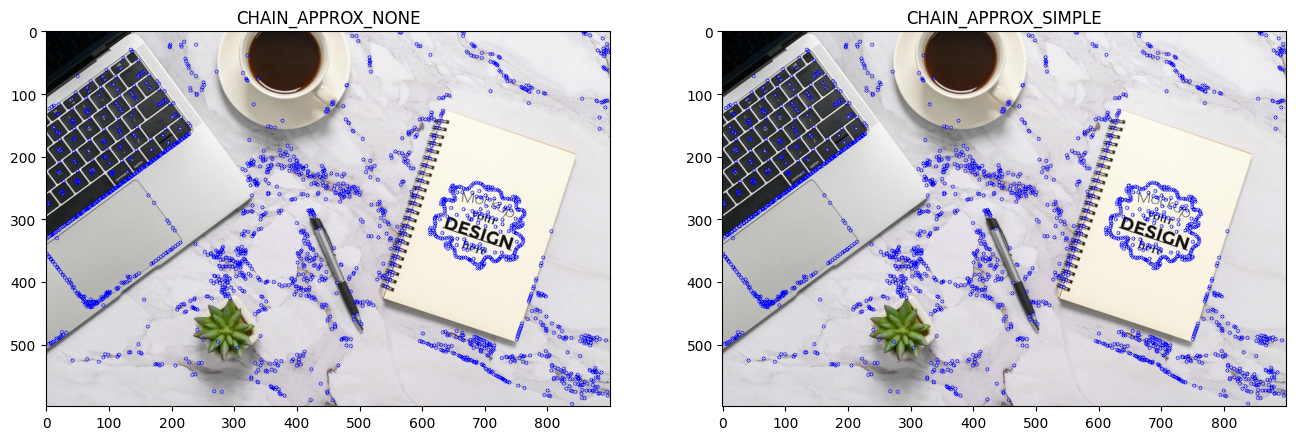

In [148]:
plt.figure(figsize=(16, 10)) 

plt.subplot(121)
plt.title("CHAIN_APPROX_NONE")
plt.imshow(image_rgb_copy1)

plt.subplot(122)
plt.title("CHAIN_APPROX_SIMPLE")
plt.imshow(image_rgb_copy2)

In [156]:
hierarchy1

array([[[   1,   -1,   -1,   -1],
        [   2,    0,   -1,   -1],
        [   3,    1,   -1,   -1],
        ...,
        [1916, 1914,   -1,   16],
        [1917, 1915,   -1,   16],
        [  -1, 1916,   -1,   16]]], dtype=int32)